In [1]:
from analysis import Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
PATH100 = "F:\Thesis\Experiments\Costs\Results\/25-06-2022 Batch-2 100.csv"
PATHME_BATCH2 = "F:\Thesis\Experiments\Costs\Results\/24-06-2022 Batch-2 ME.csv"
PATHME_BATCH3 = "F:\Thesis\Experiments\Costs\Results\/27-06-2022 Batch-3 ME.csv"
data100 = pd.read_csv(PATH100)
datame_batch2 = pd.read_csv(PATHME_BATCH2)
datame_batch3 = pd.read_csv(PATHME_BATCH3)
datame = pd.concat([datame_batch2, datame_batch3], ignore_index=True)

data100 = Analysis.append_durations(data100)
datame = Analysis.append_durations(datame)
print("fast subjects ME: ", datame['duration'].isnull().values.any())
print("fast subjects 100: ", data100['duration'].isnull().values.any())

s100_data = Analysis.convert_100_data(data100)
mes_data = Analysis.convert_me_data(datame)

print("subjects that failed the attention checks in the ME survey: ", mes_data['attention_checks_passed'].loc[mes_data['attention_checks_passed'] == False].values.any())
print("subjects that failed the attention checks in the 100-level survey: ", s100_data['attention_checks_passed'].loc[s100_data['attention_checks_passed'] == False].values.any())


fast subjects ME:  False
fast subjects 100:  False
subjects that failed the attention checks in the ME survey:  False
subjects that failed the attention checks in the 100-level survey:  False


In [2]:
print(s100_data)
print(mes_data)

     TP1    TP2    TP3    TP4    TP5    TP6    TP7    TP8    TN1    TN2  ...  \
0   80.0   89.0   87.0    0.0   77.0   90.0   60.0   85.0   75.0   60.0  ...   
1  100.0  100.0  100.0  -15.0  100.0  100.0   25.0   90.0  -20.0  100.0  ...   
2   90.0  100.0  100.0   70.0  100.0   96.0   90.0  100.0   90.0   90.0  ...   
3  100.0  100.0   95.0 -100.0  100.0   98.0   98.0   90.0   99.0   96.0  ...   
4  -90.0  100.0  100.0  100.0  100.0    0.0  -30.0  100.0  100.0  -90.0  ...   
5  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  ...   
6  -95.0   98.0   99.0  -67.0    1.0 -100.0  -99.0   98.0    1.0   99.0  ...   
7   88.0   23.0   11.0  -21.0   79.0   93.0   -8.0   69.0   84.0   98.0  ...   
8    0.0    0.0   52.0  -23.0   70.0   50.0  -72.0   86.0   90.0    0.0  ...   
9   70.0    0.0  100.0   52.0  100.0  -35.0   97.0   97.0   66.0  100.0  ...   

   Hateful_FN8  Hateful_REJ1  Hateful_REJ2  Hateful_REJ3  Hateful_REJ4  \
0          1.0           1.0           1.0   

In [3]:
print("ME scale")
Analysis.print_means(mes_data)
print("100-level scale")
Analysis.print_means(s100_data)


ME scale
TP 0.271037
TN 0.432264
FP -0.204045
FN -0.314673
REJ -0.138368
100-level scale
TP 57.35
TN 64.1375
FP -58.525
FN -57.75
REJ -28.3625


In [4]:
Analysis.print_reliabilities(mes_data, scale="ME")

Reliability scale:  0.9801106791015939
TP 0.25194344350562026
TN 0.5588106991333883
FP -0.580452821693916
FN 0.355584038393733
REJ 0.4251962167287455


In [5]:
Analysis.print_reliabilities(s100_data, scale="S100")


Reliability scale:  0.5139241696970567
TP 0.1381569009388316
TN 0.015215925616097525
FP 0.06337114185968062
FN 0.025373131060902554
REJ 0.0382508327219353


In [6]:
Analysis.print_statistics(data_mes=mes_data, data_s100=s100_data)

Cohen's d 0.11231272248007039
Shapiro Wilk normality test MES:  ShapiroResult(statistic=0.9429742693901062, pvalue=0.04359781742095947)
Shapiro Wilk normality test S100:  ShapiroResult(statistic=0.8909651637077332, pvalue=0.0010546246776357293)
Bartlett's test for equal variances:   BartlettResult(statistic=348.26277600290996, pvalue=1.0126220828818878e-77)
Mann-Whitney U test:  MannwhitneyuResult(statistic=960.0, pvalue=0.12483555125822324)
Unpaired T-test:  Ttest_indResult(statistic=0.4959595535951128, pvalue=0.6213175818858181)
Pearson:  (0.9316257620073012, 2.715229679953453e-18)
Spearman:  SpearmanrResult(correlation=0.8583489681050659, pvalue=1.4398596113694726e-12)
Kendall:  KendalltauResult(correlation=0.6846153846153847, pvalue=4.919458102076906e-10)


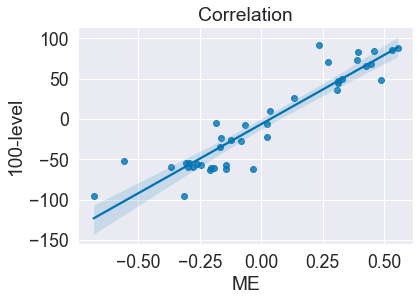

In [7]:
%matplotlib inline
sns.set_theme(style="whitegrid")
sns.set(font_scale = 1.6, palette="colorblind")
Analysis.plot_validity(data_mes=mes_data, data_s100=s100_data)

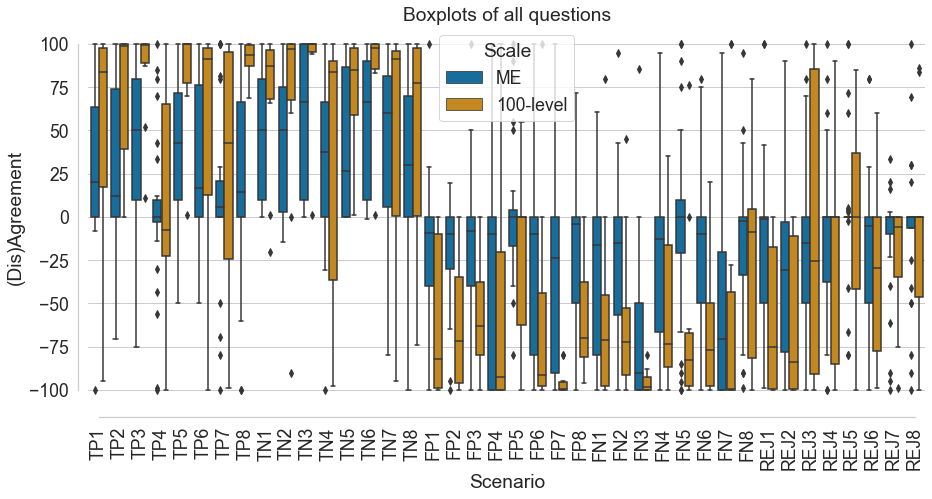

In [8]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_dual_boxplots(data_mes=mes_data, data_s100=s100_data)

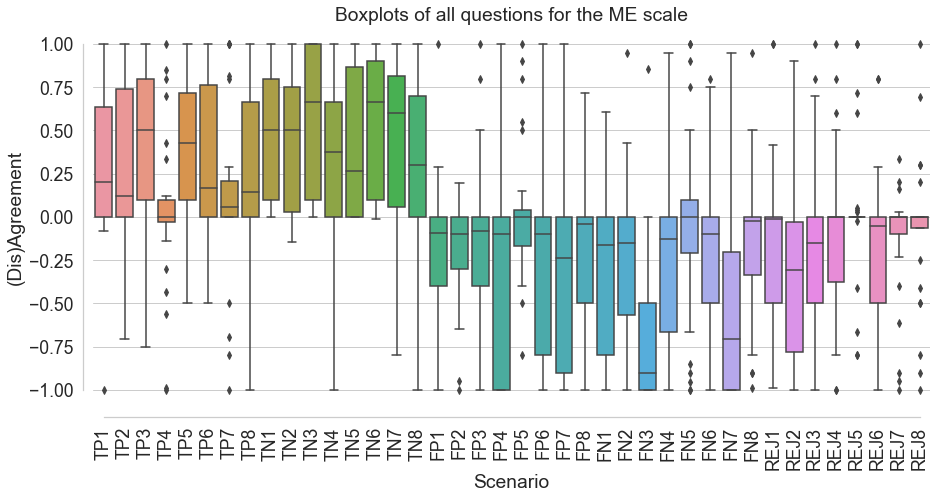

In [9]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_boxplots(data=mes_data, scale_title="ME")

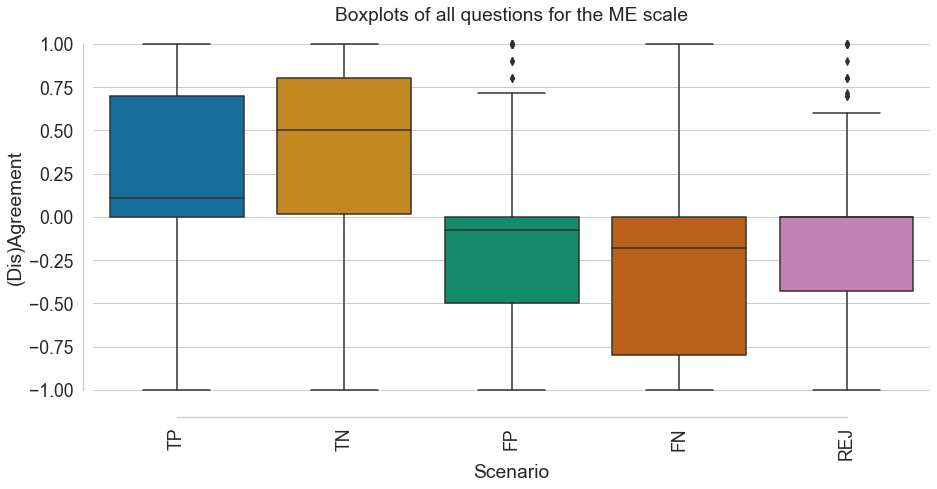

In [10]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_boxplots(data=mes_data, scale_title="ME", show_individual=False)

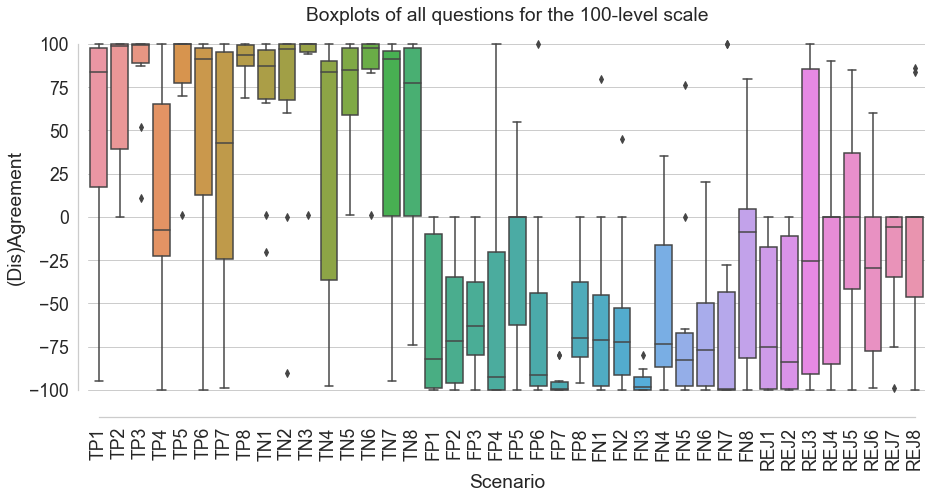

In [11]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_boxplots(data=s100_data, scale_title="100-level")

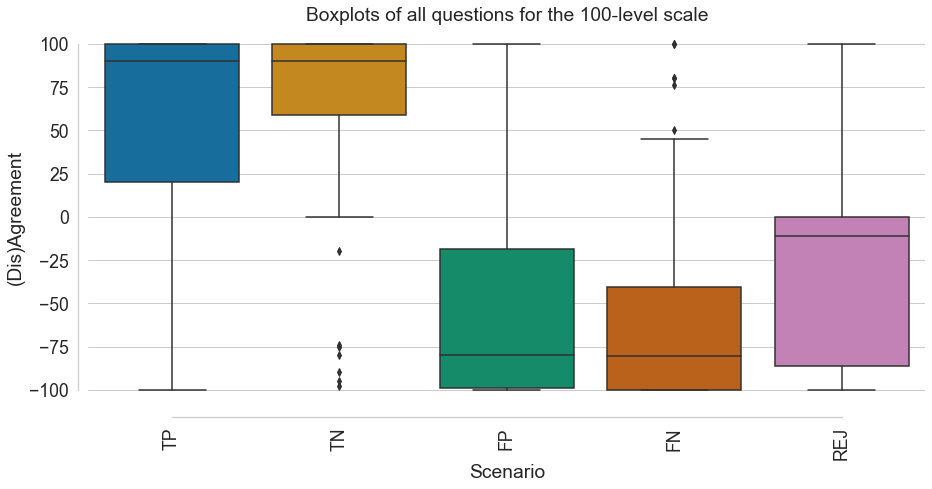

In [12]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_boxplots(data=s100_data, scale_title="100-level", show_individual=False)

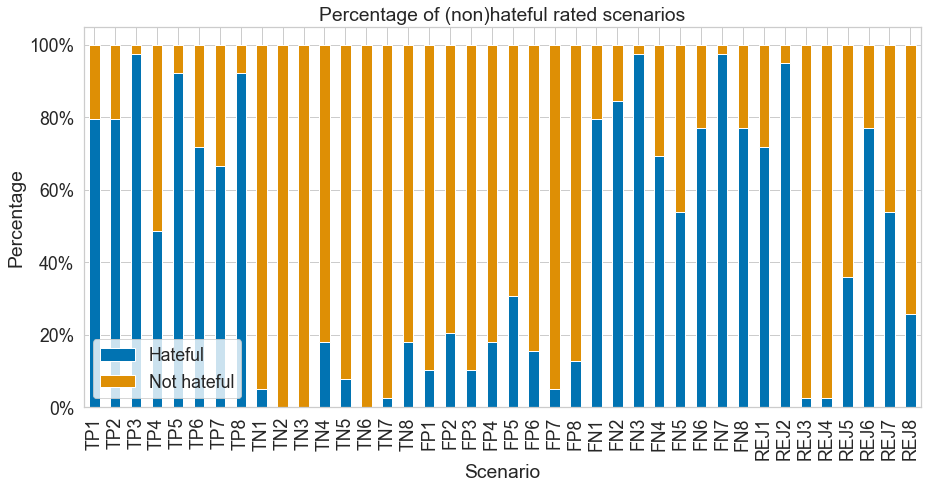

In [13]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_hatefulness(data_mes=mes_data, data_s100=s100_data)